In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

In [3]:
# read the raw dataset
df = pd.read_csv('../data/raw/data.csv')

In [4]:
# explore dataframe
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.shape

(6362620, 11)

In [7]:
# to set pandas to display the summary statistics in fixed point rather than exponential notation
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


For our initial exploration since the data is large we will randomly sample 100,000 for the visualizations when we are exploring the data set. This is in order to limit the time it takes to generate the graphs.

In [8]:
# sample 100,000 from the 6 million+ dataset

sample_df = df.sample(n=int(1e5))

In [31]:
# check how many transactions are fraud verus not fraud

sample_df['isFraud'].value_counts()

isFraud
0    99862
1      138
Name: count, dtype: int64

As we can see that a very small percentage of our transactions is actually fraudulant and therefore we have a imbalanced dataset. In our cleaning will will have to tweak the size of the dataset in order for us to get better results when training the machine learning model.

# Univariate Analysis

In [29]:
# the number of each unique type of transaction
sample_df['type'].value_counts()

type
CASH_OUT    35193
PAYMENT     33888
CASH_IN     21957
TRANSFER     8302
DEBIT         660
Name: count, dtype: int64

In [30]:
sample_df['type'].value_counts(normalize=True)

type
CASH_OUT   0.35
PAYMENT    0.34
CASH_IN    0.22
TRANSFER   0.08
DEBIT      0.01
Name: proportion, dtype: float64

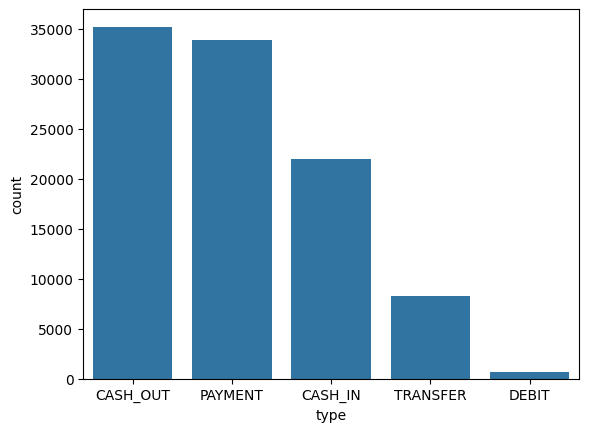

In [25]:
# visually show each type of transaction using a countplot.
order = sample_df['type'].value_counts()
sns.countplot(data=sample_df, x=sample_df['type'], order=order.index)
plt.show()

We can see that majority of the transactions are CASHOUT, PAYMENT or CASHIN making up 90% of all transactions.

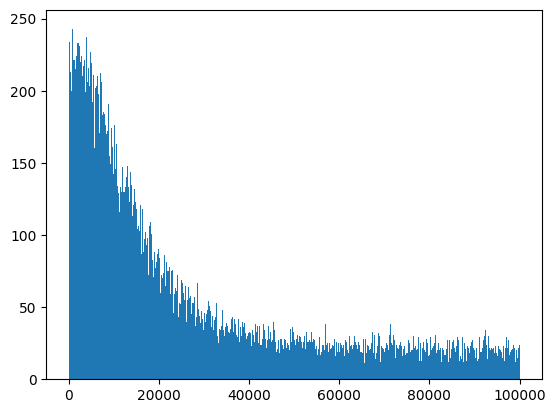

In [10]:
# histogram of the amount
plt.hist(sample_df["amount"], range=(0, 1e5), bins=1000)
plt.show()


We see that this is right skewed and that most of the amounts that are being transfered are less than 20,000. 

# Bivariate Analysis

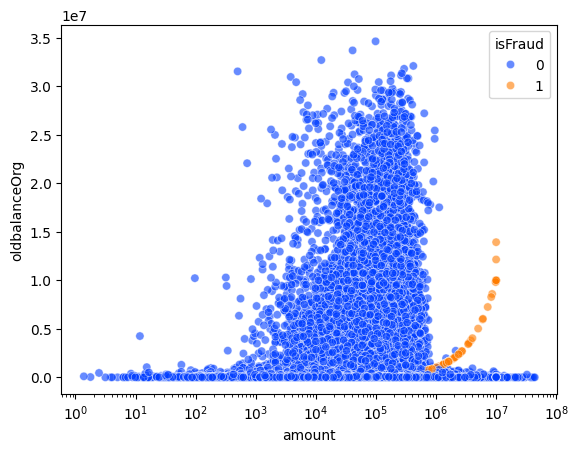

In [11]:
# looking at the amount verus the old balance in the transaction
sns.scatterplot(data=sample_df, x='amount', y='oldbalanceOrg', hue='isFraud', palette='bright', alpha=0.6)
plt.xscale('log')

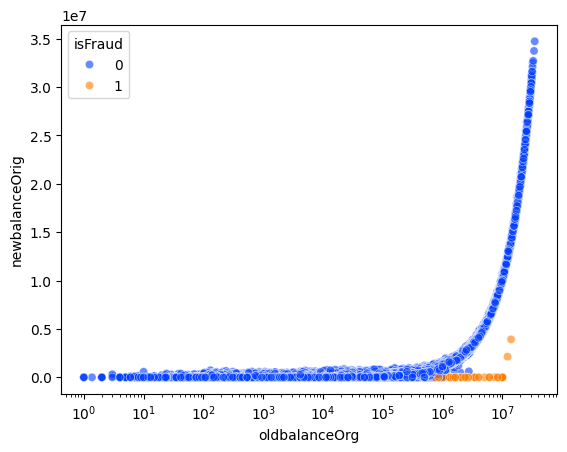

In [36]:
# looking at the amount verus the old balance in the transaction
sns.scatterplot(data=sample_df, x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', palette='bright', alpha=0.6)
plt.xscale('log')

In this plot we can see most of the old balance is around 10e6 to 10e7 but afterwards the new balance is 0 suggesting that most of the fraudulent cases they empty out the entire account.

From the scatterplot we can clearly see that there seems to be a pattern in which transactions are fraud with most of them having an oldbalanceOrg and being 10^7 in amount.

# Heatmap 

In [ ]:
# drop non-numerical columns
sample_df = sample_df.drop(['step', 'nameDest', 'nameOrig', 'type'], axis=1)

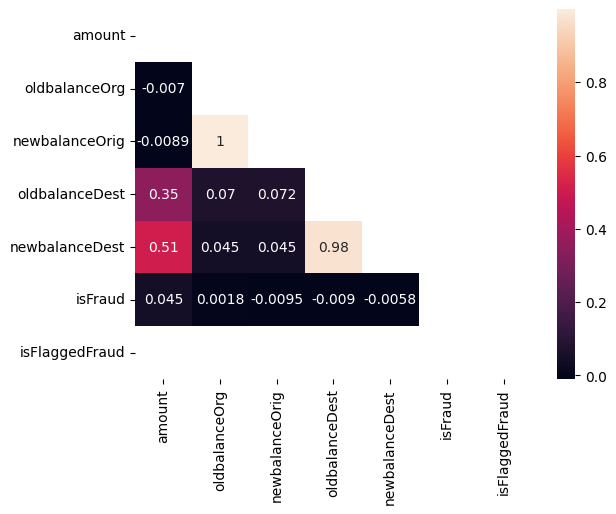

In [ ]:
# plot a correlation heat map of selected columns in the dataset
mask = np.triu(np.ones_like(sample_df.corr(), dtype=bool))

sns.heatmap(sample_df.corr(), annot=True, mask=mask)
plt.show()